# STUDENTS PERFORMANCE IN EXAMS AND PREDICTING SCORE IN MATH USING ML ALGOS

This dataset consists of 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'png'
sns.set()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
data=pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Dataset has zero null values with 8 columns and 1000 rows.

In [5]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
data.columns.unique()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

**Renaming Columns**

In [7]:
columns1={'gender':'gender','race/ethnicity':'race','parental level of education':'parent_ed_level','lunch':'lunch_type','test preparation course':'test_prep','math score':'math','reading score':'reading','writing score':'writing'}
data.rename(columns=columns1,inplace=True)

In [8]:
data.head()

,gender,race,parent_ed_level,lunch_type,test_prep,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Data Wrangling**

In [9]:
data['total']=data['math']+data['reading']+data['writing']

In [10]:
data['parent_ed_level'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

As we can see "some high school" and "high school" represent the same level of education, we can replace the former with a single value namely "high school".

In [11]:
data['parent_ed_level']=data['parent_ed_level'].replace(['some high school'],'high school')
data['parent_ed_level'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school'], dtype=object)

In [12]:
data['lunch_type']=data['lunch_type'].replace(['free/reduced'],'reduced')

In [13]:
data.head()

,gender,race,parent_ed_level,lunch_type,test_prep,math,reading,writing,total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gender           1000 non-null   object
 1   race             1000 non-null   object
 2   parent_ed_level  1000 non-null   object
 3   lunch_type       1000 non-null   object
 4   test_prep        1000 non-null   object
 5   math             1000 non-null   int64 
 6   reading          1000 non-null   int64 
 7   writing          1000 non-null   int64 
 8   total            1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


**VISUAL DATA ANALYSIS**

1) UNIVARIATE ANALYSIS

In this we look at one feature at a time. Finding out the distribution of that feature while ignoring other features is usually done here.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6915c0a50>,
      dtype=object)

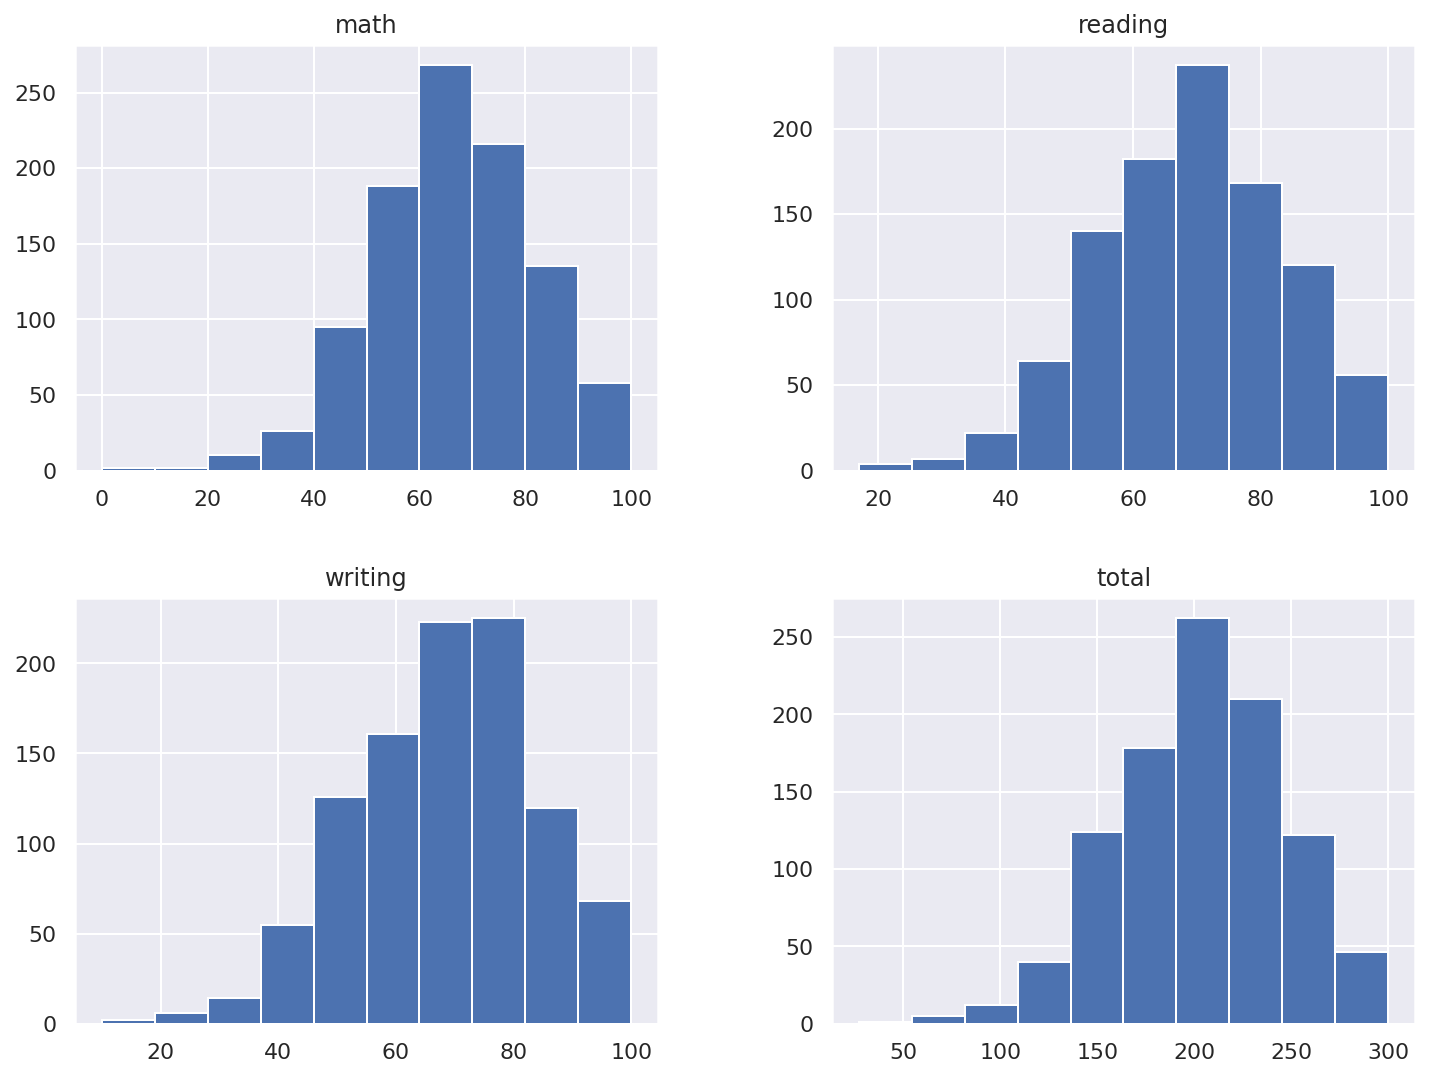

In [15]:
data[['math','reading','writing','total']].hist(figsize=(12,9))

Every distribution plotted above is Left-Skewed.

BOXPLOTS

In [16]:
#function to create a boxplot
def boxplot(column,dataf):
    plt.figure(figsize=(10,4))
    sns.boxplot(x=column,data=dataf)

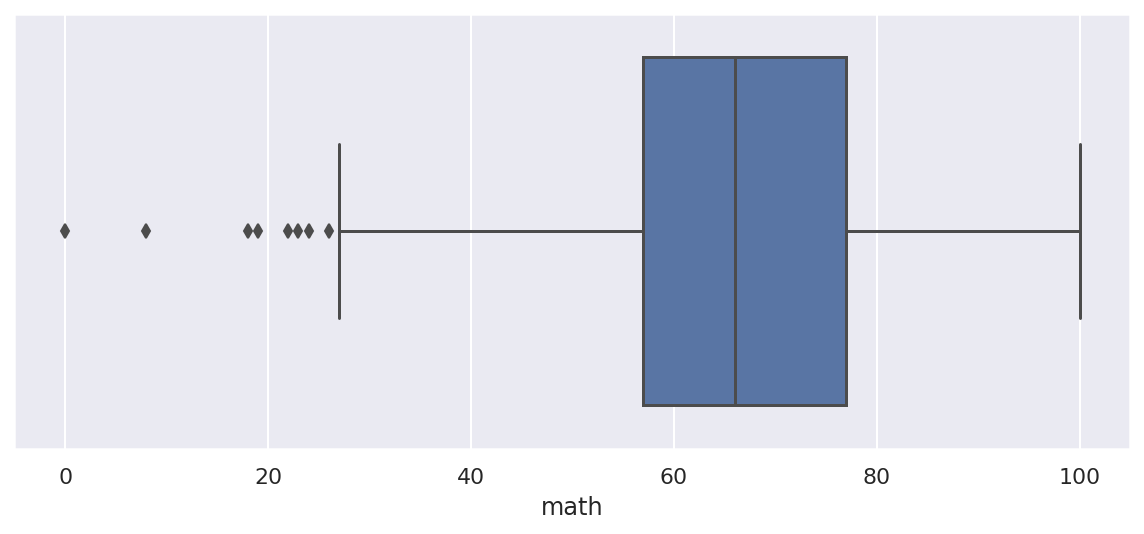

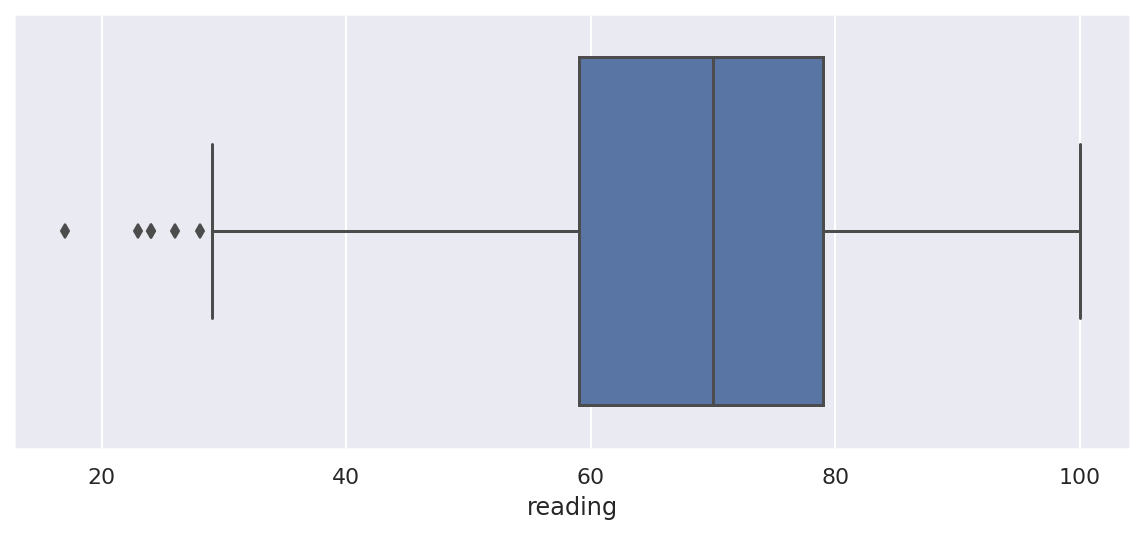

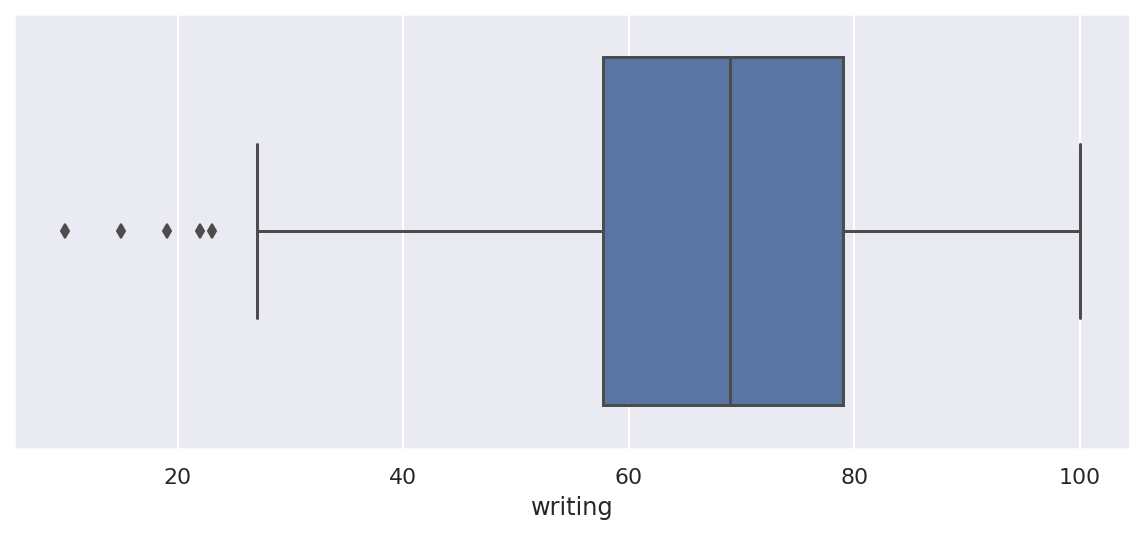

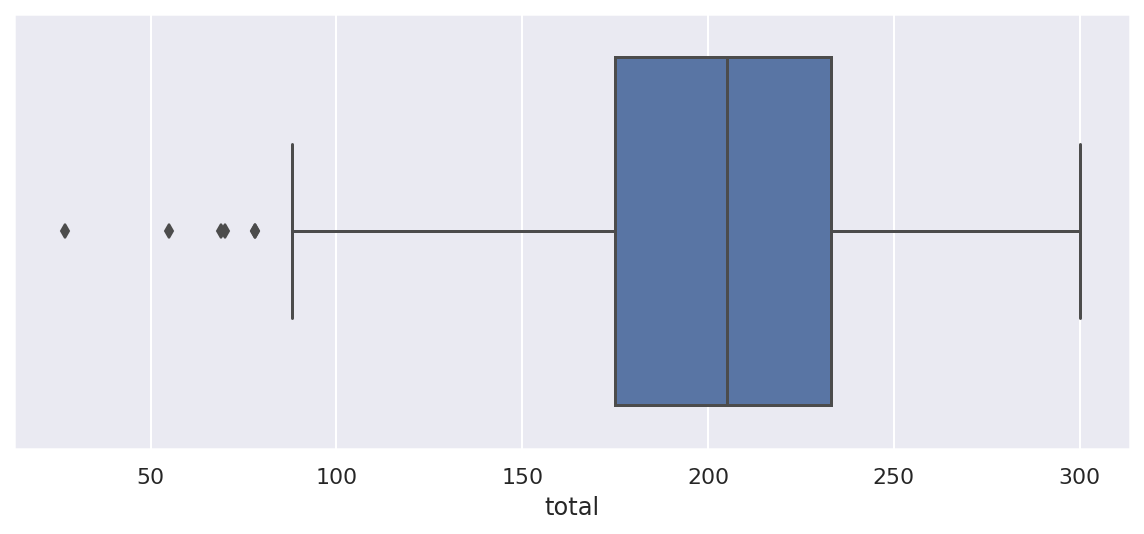

In [17]:
nums=['math','reading','writing','total']
for i in nums:
    boxplot(i,data)

#Interpreting boxplots

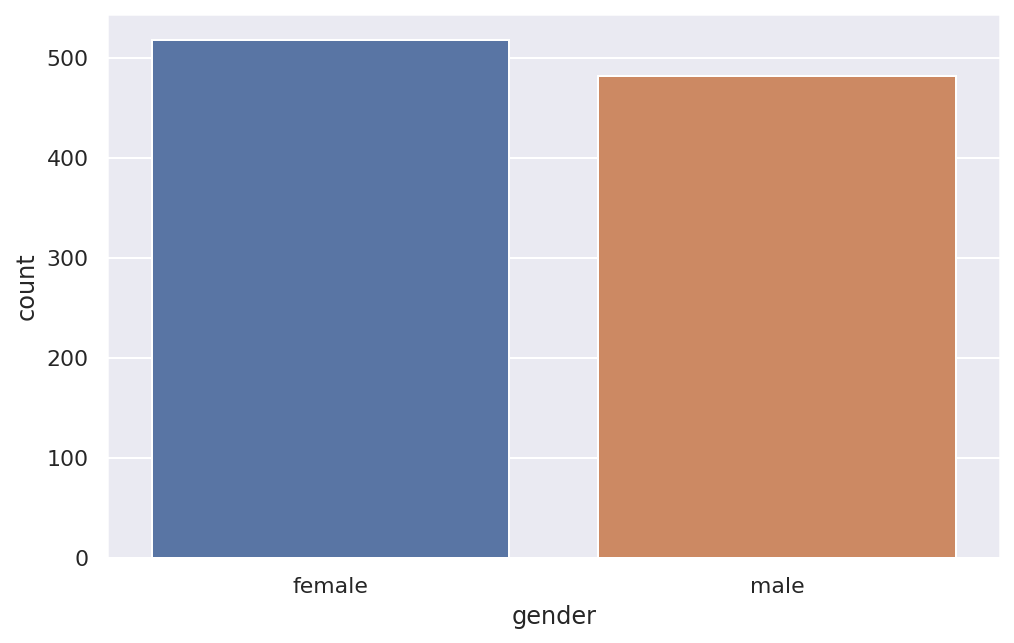

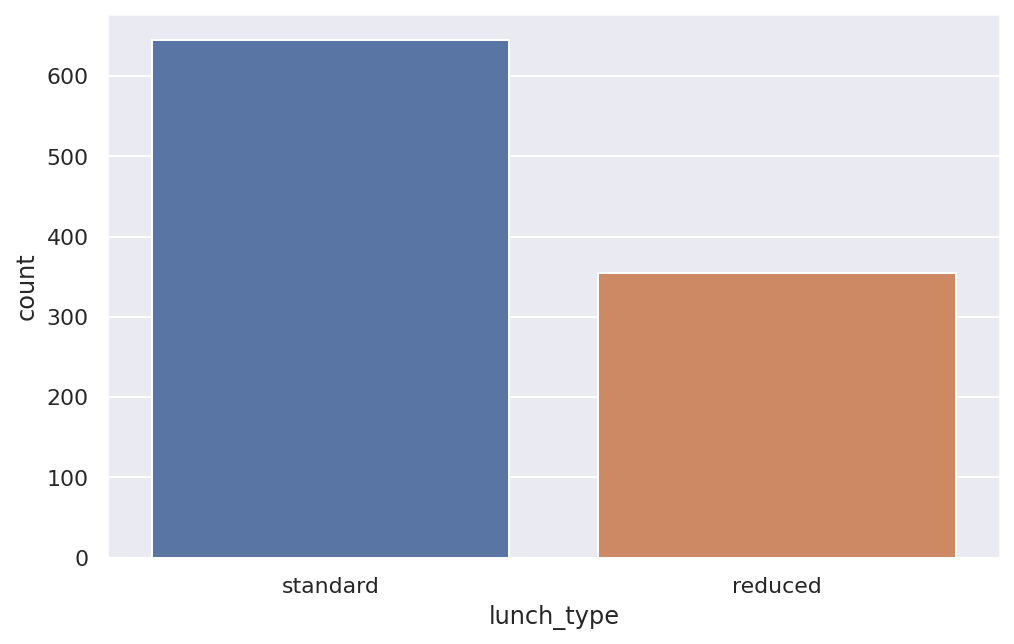

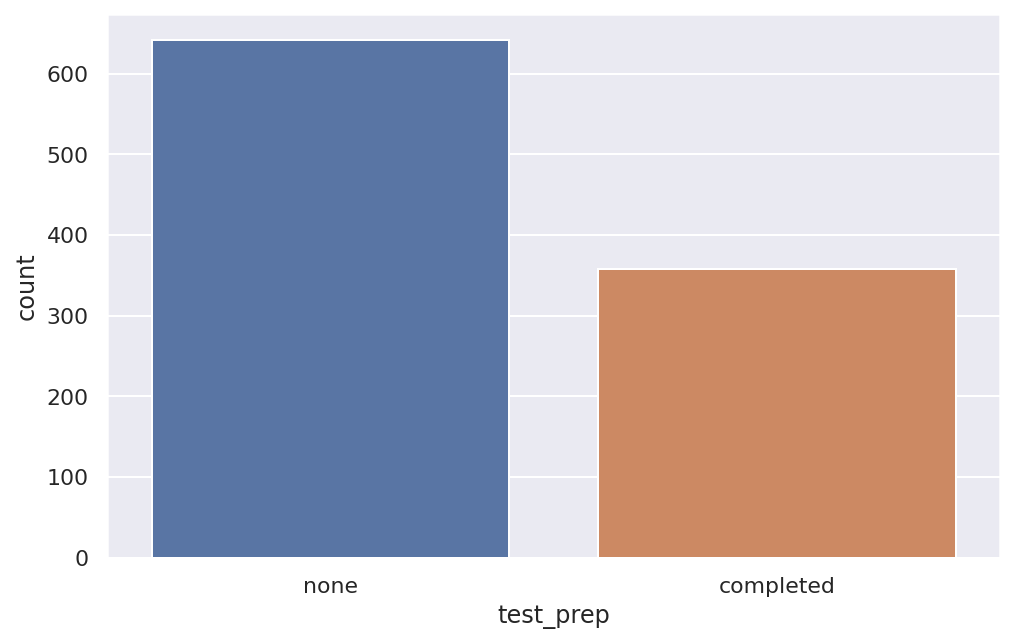

In [18]:
cat_list=['gender','lunch_type','test_prep']
for col in cat_list:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col,data=data)

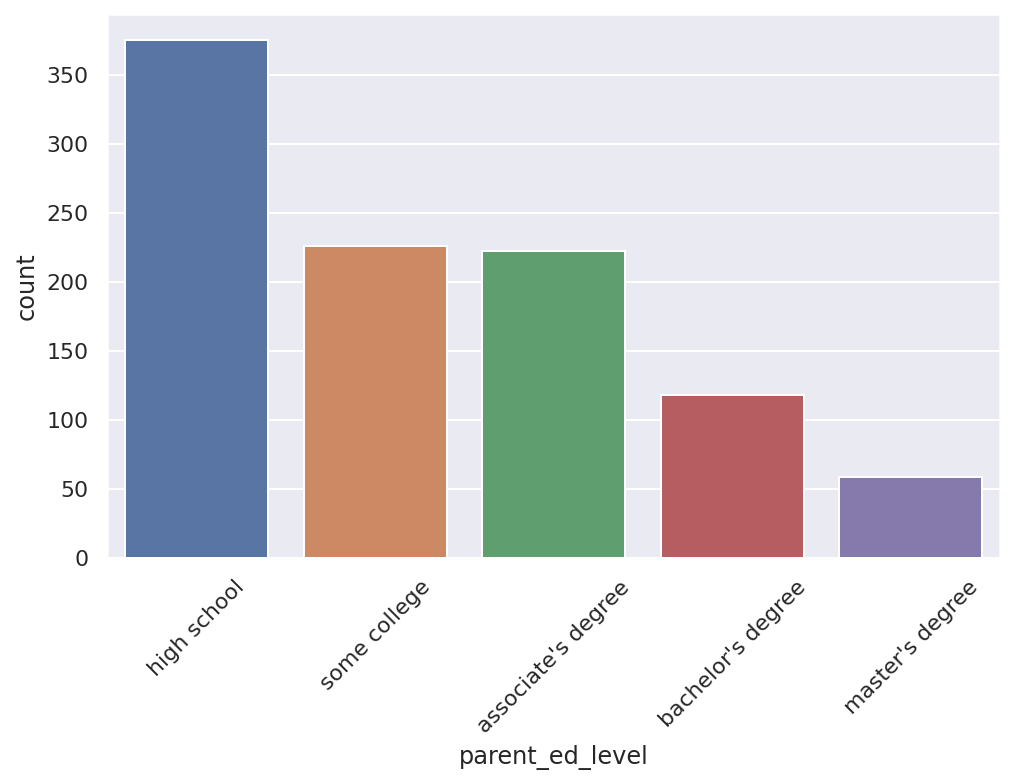

In [19]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=45)
sns.countplot(x='parent_ed_level',data=data,order=['high school','some college',"associate's degree","bachelor's degree","master's degree"])

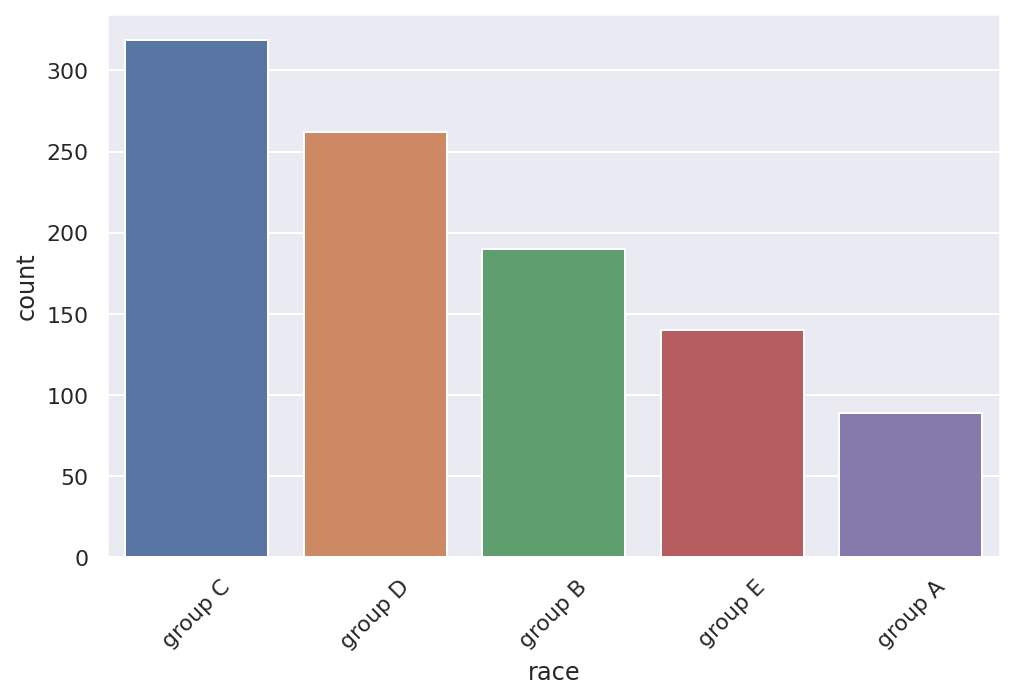

In [20]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=45)
sns.countplot(x='race',data=data,order=['group C','group D',"group B","group E","group A"])

2) MULTIVARIATE ANALYSIS

In [29]:
def hue(a,b):
    plt.figure(figsize=(8,5))
    if a=='parent_ed_level':
        plt.xticks(rotation=45)
    sns.countplot(x=a,data=data,hue=b)

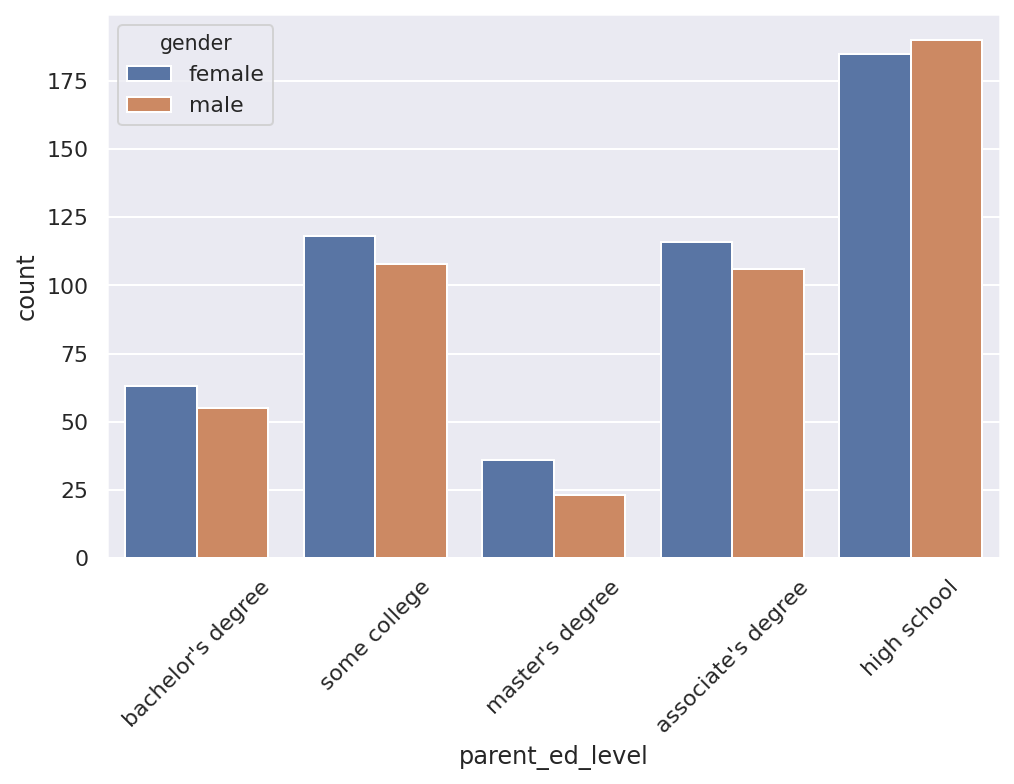

In [30]:
hue('parent_ed_level','gender')

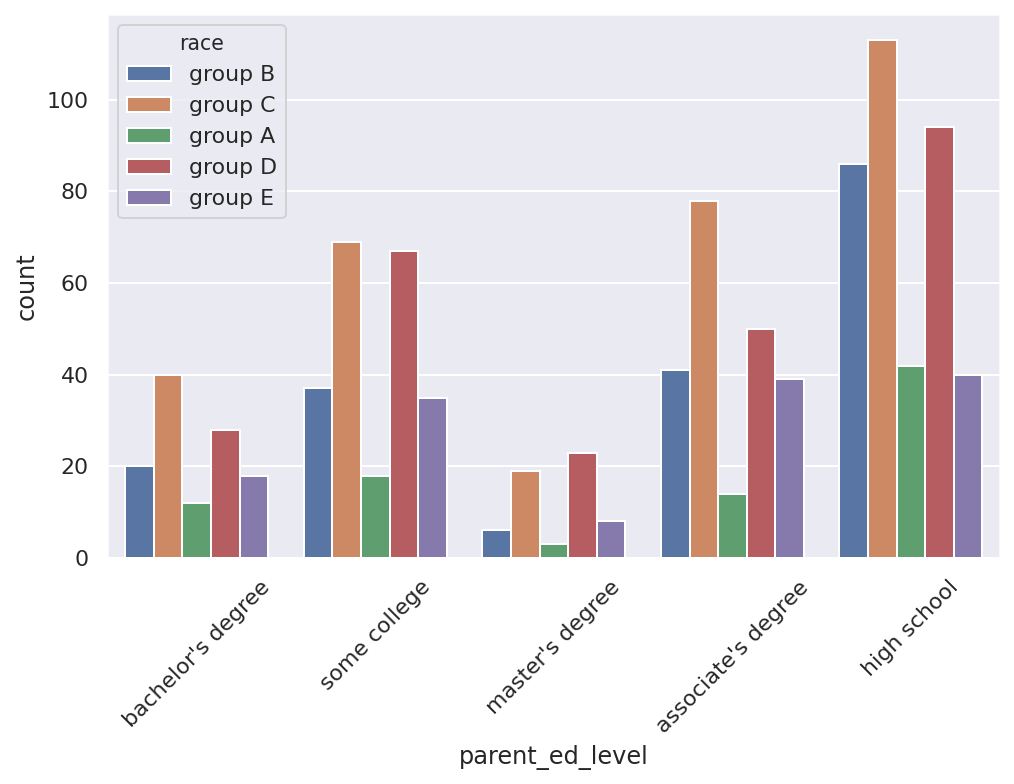

In [31]:
hue('parent_ed_level','race')

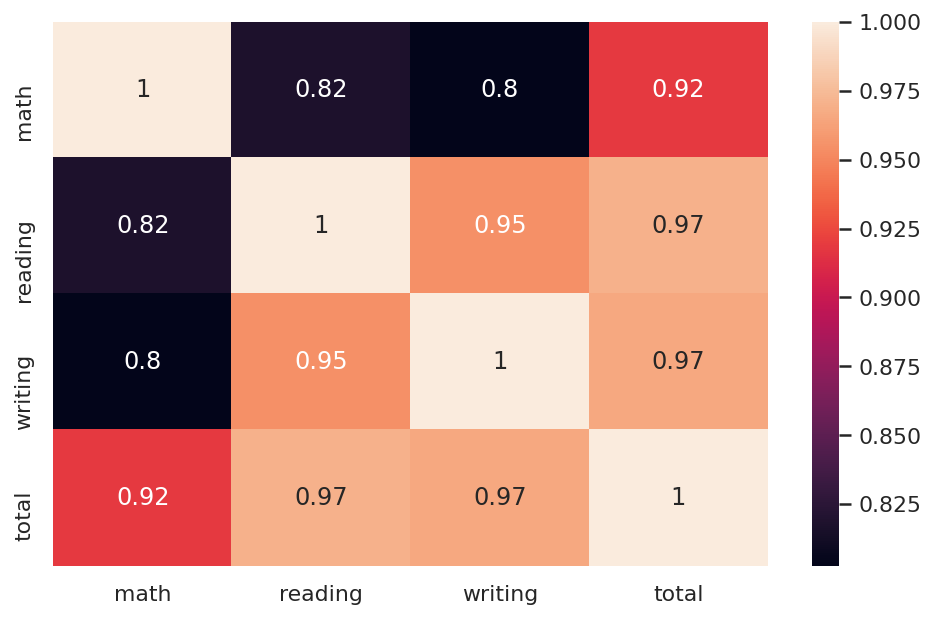

In [21]:
corr_matrix=data[nums].corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix,annot=True)

Correlation of "total" with "Reading" and "writing" is very high so we drop the total column.

In [22]:
data.drop(['total'],axis=1,inplace=True)

Now for feature engineering and feature selection to predict math score of students, I will create a copy of the original dataset and manipulate features there.

In [23]:
new_data=data.copy()

In [24]:
new_data.drop(['writing'],inplace=True,axis=1)

In [25]:
new_data.head()

,gender,race,parent_ed_level,lunch_type,test_prep,math,reading
0,female,group B,bachelor's degree,standard,none,72,72
1,female,group C,some college,standard,completed,69,90
2,female,group B,master's degree,standard,none,90,95
3,male,group A,associate's degree,reduced,none,47,57
4,male,group C,some college,standard,none,76,78


AttributeError: 'PathCollection' object has no property 'reg'

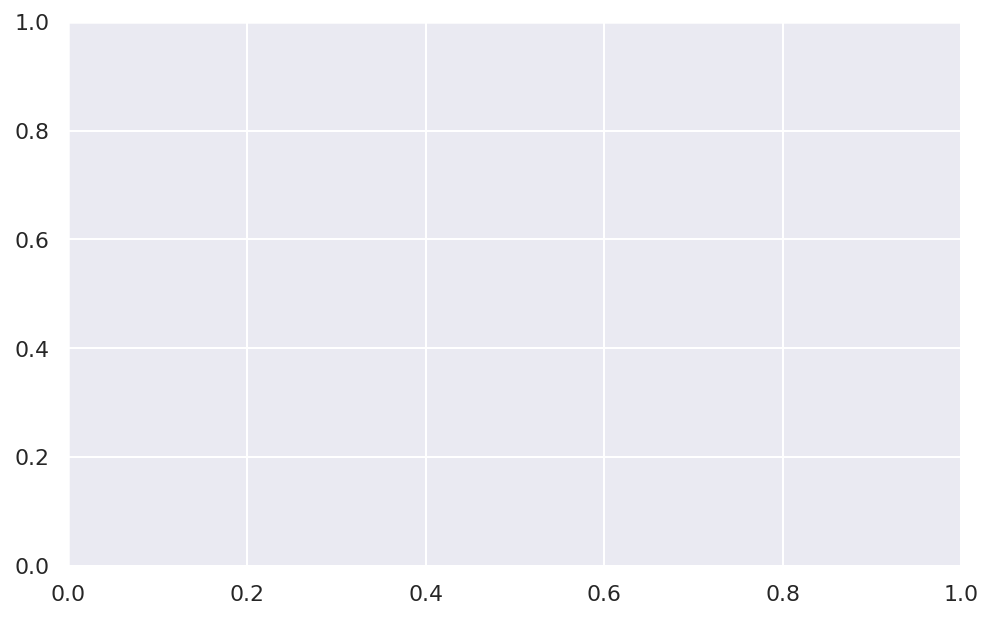

In [34]:
hue_list=['gender','race','parent_ed_level','lunch_type','test_prep']
for hue in hue_list:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='math',y='reading',data=new_data,hue=hue)